In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 0
pd.options.display.max_rows = 20
#pd.options.display.max_rows = None


In [13]:
listings0 = pd.read_csv("datasets/listings.csv")
listings0.shape

(59824, 29)

### Data exploration

In [14]:
listings0.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,119445,7949480,f,40.852054,-73.788680,NYC,City Island Sanctuary relaxing BR & Bath w Par...,99.0,House,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,9117975,16042478,t,40.853491,-73.788607,NYC,WATERFRONT STUDIO APARTMENT,200.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,9815788,1886820,f,40.841144,-73.783052,NYC,Quaint City Island Community.,300.0,House,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,13886510,6627449,f,40.849775,-73.786609,NYC,Large 1 BDRM in Great location,125.0,Apartment,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,28811542,5557381,t,40.850024,-73.789328,NYC,Quaint City Island Home,69.0,House,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464


The relevant features we will are:

1. **city:** Neighborhood/city the property located in
2. **id:** ID of the listed property
3. **price:** One-night rental price of the property, in U.S. dollars
4. **property_type:** Type of the property
5. **state:** State name Gross domes
6. **zipcode:** Zipcode of the property’s location
   **accommodates:** List of amenities available in theproperty, comma-delimited
    

In [15]:
listings = listings0[['accommodates', 'availability_30', 'bathrooms', 'bedrooms', 'cancellation_policy',
          'city', 'host_id', 'id', 'instant_bookable', 'latitude', 'longitude', 'metropolitan', 'price',
          'property_type', 'room_type', 'state', 'weekly_price', 'zipcode']]

In [16]:
listings.describe(include = 'all')

,accommodates,availability_30,bathrooms,bedrooms,cancellation_policy,city,host_id,id,instant_bookable,latitude,longitude,metropolitan,price,property_type,room_type,state,weekly_price,zipcode
count,59763.000000,59824.000000,59622.000000,59729.000000,59824,59778,5.982400e+04,5.982400e+04,59824,59824.000000,59824.000000,59824,59824.000000,59820,59824,59824,13438.000000,58998
unique,NaN,NaN,NaN,NaN,7,133,NaN,NaN,2,NaN,NaN,5,NaN,32,3,9,NaN,474
top,NaN,NaN,NaN,NaN,strict,new york,NaN,NaN,f,NaN,NaN,NYC,NaN,Apartment,Entire home/apt,NY,NaN,11211
freq,NaN,NaN,NaN,NaN,25278,19566,NaN,NaN,47009,NaN,NaN,40740,NaN,46149,32103,40738,NaN,2043
mean,3.031960,7.976448,1.183447,1.221969,NaN,NaN,3.100695e+07,1.007171e+07,NaN,40.651362,-76.674881,NaN,159.009378,NaN,NaN,NaN,856.471201,NaN
std,1.999427,10.062641,0.483726,0.775982,NaN,NaN,3.216733e+07,5.507015e+06,NaN,0.862090,7.139989,NaN,236.200222,NaN,NaN,NaN,712.856777,NaN
min,1.000000,0.000000,0.000000,0.000000,NaN,NaN,7.200000e+01,5.900000e+02,NaN,38.823403,-105.094563,NaN,0.000000,NaN,NaN,NaN,70.000000,NaN
25%,2.000000,0.000000,1.000000,1.000000,NaN,NaN,5.453285e+06,5.477726e+06,NaN,40.673848,-76.981725,NaN,70.000000,NaN,NaN,NaN,450.000000,NaN
50%,2.000000,3.000000,1.000000,1.000000,NaN,NaN,1.965590e+07,1.022793e+07,NaN,40.722133,-73.972984,NaN,109.000000,NaN,NaN,NaN,675.000000,NaN
75%,4.000000,13.000000,1.000000,1.000000,NaN,NaN,4.667932e+07,1.505785e+07,NaN,40.791820,-73.942720,NaN,176.000000,NaN,NaN,NaN,1000.000000,NaN


### cleaning the ```zipcode``` column 

In [17]:
listings['zipcode'] = listings['zipcode'].astype('str')

listings['zipcode_clean'] = listings['zipcode']
#listings[listings['len'] < 5]
listings['zipcode'][listings['zipcode'].isin(['nan', '1m', ' '])] = ''
listings['len'] = listings['zipcode'].apply( lambda x : len(str(x)))

listings['zipcode_clean'][listings['len'] == 1] = listings['zipcode'][listings['len'] == 1].apply( lambda x : '0000'+str(x))
listings['zipcode_clean'][listings['len'] == 2] = listings['zipcode'][listings['len'] == 2].apply( lambda x : '000'+str(x))
listings['zipcode_clean'][listings['len'] == 3] = listings['zipcode'][listings['len'] == 3].apply( lambda x : '00'+str(x))
listings['zipcode_clean'][listings['len'] == 4] = listings['zipcode'][listings['len'] == 4].apply( lambda x : '0'+str(x))
listings['zipcode_clean'] = list(listings['zipcode_clean'].str.slice(0,5))

listings.drop(['len'], axis = 1, inplace = True)
listings[['zipcode', 'zipcode_clean']][listings['zipcode'] != listings['zipcode_clean']].drop_duplicates()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

,zipcode,zipcode_clean
69,,nan
831,11103-3233,11103
4307,11426-1175,11426
13779,10003-8623,10003
16381,11355.0,11355
16382,11354.0,11354
16396,11365.0,11365
16399,11358.0,11358
16405,11367.0,11367
16414,11366.0,11366


## Look into the property types of our interest

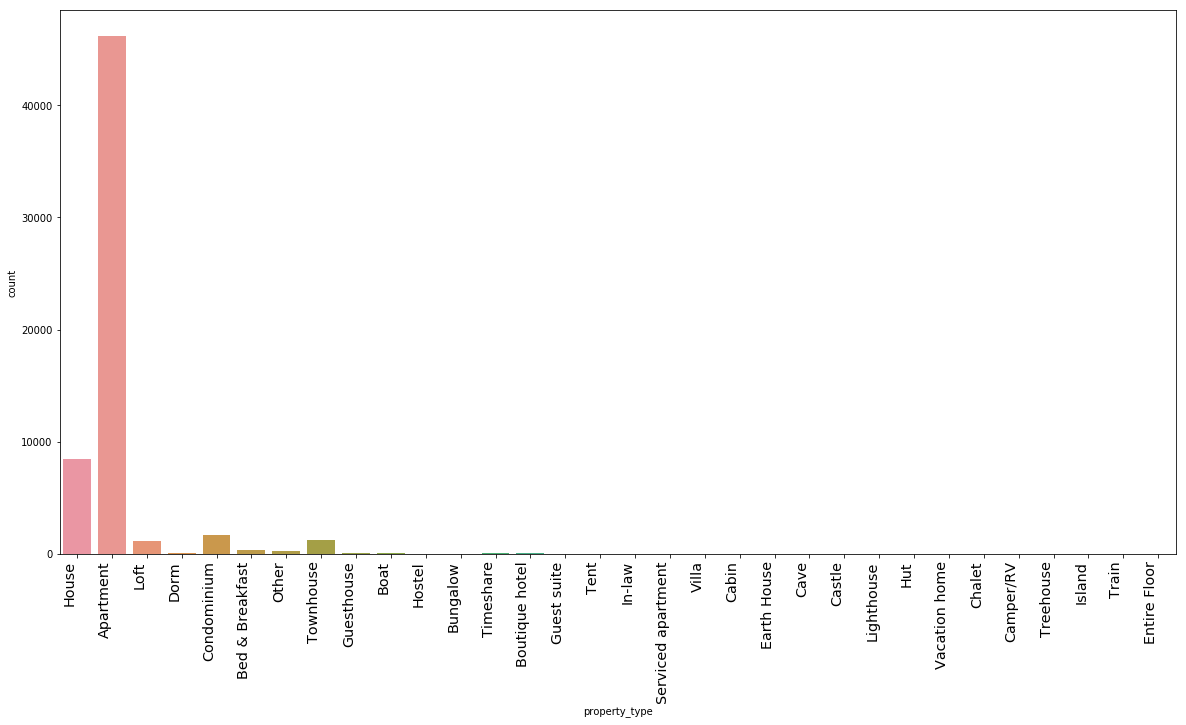

In [20]:
plt.figure(figsize=(20, 10))
sns.countplot('property_type',data=listings)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

In [21]:
print("listings shape: " + str(listings.shape))
listings_filt = (listings[listings['property_type'].isin(['Apartment',
'House',
'Condominium',
'Townhouse',
'Loft',
'Bed & Breakfast'])] )
print("listings_filt shape properties filter: " + str(listings_filt.shape))
listings_filt = listings_filt[listings_filt['zipcode_clean'] != 'nan']
listings_filt = listings_filt[listings_filt['zipcode_clean'] != '']
print("listings_filt shape zipcode filter: " + str(listings_filt.shape))

listings shape: (59824, 19)
listings_filt shape properties filter: (59068, 19)
listings_filt shape zipcode filter: (58251, 19)


In [19]:
listings_filt.groupby("property_type")["price"].describe().sort_values(by="std")

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Bed & Breakfast,333.0,124.792793,100.365697,28.0,70.0,99.0,150.00,1100.0
Apartment,45499.0,148.786743,192.833768,0.0,75.0,110.0,175.00,10000.0
Loft,1090.0,207.348624,274.594647,14.0,80.0,135.0,220.00,3500.0
Condominium,1698.0,209.196702,286.153700,14.0,85.0,130.0,220.00,5150.0
Townhouse,1267.0,208.790055,306.088424,10.0,75.0,119.0,220.00,3600.0
House,8364.0,189.346844,371.917232,0.0,60.0,90.0,176.25,8000.0


### Looking how works the price and the type of room

In [8]:
listings_filt[listings_filt['id'] == 9513511]

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,zipcode_clean
12,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",0,1.0,Real Bed,2.0,2.0,strict,sunnysidebronx,NaN,49293611,9513511,f,40.857532,-73.866055,NYC,"Beautiful, spacious & sunny 2 bedroom apartment!",130.0,Apartment,10.0,10.0,10.0,9.0,85.0,10.0,Entire home/apt,NY,NaN,10462,10462


Making some comparisons between and the property that appears below the price seems is for the entire property no matter the ammount of hosts(1-4) **the room_type is Entire home/apt**

https://es.airbnb.com/rooms/33996721?source_impression_id=p3_1607654687_VwuIYsi17KyB1SFb&guests=4&adults=4&check_in=2020-12-10&check_out=2020-12-11

In [53]:
listings_filt[listings_filt['id'] == 715270]

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,zipcode_clean,num_properties
7,3.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",5,1.0,Real Bed,1.0,2.0,strict,sunnysidebronx,NaN,3684360,715270,f,40.859559,-73.870669,NYC,2 Beds/Queen & Full Beautiful Room 40 minsT.Sq...,39.0,Apartment,9.0,9.0,9.0,9.0,90.0,9.0,Private room,NY,NaN,10467,10467,38


https://www.airbnb.com.co/rooms/715270?_set_bev_on_new_domain=1607653226_NjA2YWE1MWJiZThm&source_impression_id=p3_1607655943_pGlw%2B57yLA4ssX5m&guests=1&adults=1&check_in=2021-02-23&check_out=2021-02-25
the price change with the number of hosts but not proportional to the inicial price, the amount increase about 12$ per host **the room_type is private**

In [57]:
listings_filt.groupby(['property_type', 'room_type'])['room_type'].count()

property_type    room_type      
Apartment        Entire home/apt    25569
                 Private room       18658
                 Shared room         1272
Bed & Breakfast  Entire home/apt       37
                 Private room         265
                 Shared room           31
Condominium      Entire home/apt     1074
                 Private room         602
                 Shared room           22
House            Entire home/apt     3425
                 Private room        4751
                 Shared room          188
Loft             Entire home/apt      623
                 Private room         430
                 Shared room           37
Townhouse        Entire home/apt      620
                 Private room         624
                 Shared room           23
Name: room_type, dtype: int64

Probably our investor is not interesting to live in the property that want to rent, so i think the type of room that we are interesting is on the ```"Entire home/apt"``` 

#### Taking only the ```"Entire home/apt"``` properties

In [22]:
listings_filt2 = listings_filt[listings_filt['room_type'] == 'Entire home/apt']
listings_filt2.shape

(31348, 19)

In [23]:
tem_num_properties = (
    pd.DataFrame(
    listings_filt2
    .groupby("zipcode_clean" )['zipcode_clean']
        .count()
        .sort_values(ascending = False))
    .rename(columns = {'zipcode_clean' : 'num_properties'})
    .reset_index()
    
)
tem_num_properties

,zipcode_clean,num_properties
0,11211,981
1,20009,949
2,20002,871
3,20001,778
4,10002,684
5,10003,659
6,10011,657
7,10009,641
8,11238,595
9,10014,588


In [24]:
listings_filt2 = (listings_filt2
                 .merge(tem_num_properties, 
                        #how = 'left', 
                        on = 'zipcode_clean')
                )
#listings_filt[listings_filt['num_properties'].isna()]
listings_filt2.shape

(31348, 20)

In [25]:
listings_filt3 = listings_filt2[listings_filt2['num_properties'] >= 50]
listings_filt3.shape

(28947, 20)

In [26]:
listings_filt3.head()

,accommodates,availability_30,bathrooms,bedrooms,cancellation_policy,city,host_id,id,instant_bookable,latitude,longitude,metropolitan,price,property_type,room_type,state,weekly_price,zipcode,zipcode_clean,num_properties
41,4.0,0,1.0,2.0,flexible,new york,7809661,4357134,f,40.771715,-73.917688,NYC,200.0,Apartment,Entire home/apt,NY,NaN,11102,11102,109
42,2.0,0,1.0,1.0,strict,astoria,73541674,16975094,f,40.773187,-73.916874,NYC,100.0,Apartment,Entire home/apt,NY,NaN,11102,11102,109
43,3.0,0,1.0,1.0,flexible,queens,5226800,12956315,f,40.773737,-73.919031,NYC,100.0,Apartment,Entire home/apt,NY,NaN,11102,11102,109
44,3.0,0,1.0,1.0,flexible,queens,243275,13055480,f,40.773485,-73.917991,NYC,110.0,Apartment,Entire home/apt,NY,NaN,11102,11102,109
45,4.0,0,2.0,2.0,strict,queens,71378038,12972200,f,40.776876,-73.927829,NYC,125.0,Apartment,Entire home/apt,NY,NaN,11102,11102,109
